<a href="https://colab.research.google.com/github/harshbhabhera/Finance/blob/master/StochaisticRSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NIFTY.csv to NIFTY.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['NIFTY.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df.head(10)



,Date,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying
0,03-01-2005,NIFTY,27-01-2005,2092.00,2122.00,2091.70,2118.70,2121.25,2118.70,62614,2.638183e+10,11977400,640600,2115.00
1,04-01-2005,NIFTY,27-01-2005,2114.70,2120.00,2105.50,2108.85,2111.70,2108.85,54090,2.284549e+10,12632200,654800,2103.75
2,05-01-2005,NIFTY,27-01-2005,2104.00,2104.00,1997.00,2033.75,2025.25,2033.75,174022,7.141097e+10,12451400,-180800,2032.20
3,06-01-2005,NIFTY,27-01-2005,2025.00,2038.50,1987.00,1998.50,1994.10,1998.50,145413,5.849470e+10,12973400,522000,1998.35
4,07-01-2005,NIFTY,27-01-2005,1996.15,2026.75,1990.15,2019.80,2016.70,2019.80,78866,3.170309e+10,12953200,-20200,2015.50
5,10-01-2005,NIFTY,27-01-2005,2019.00,2024.80,1971.40,1976.95,1972.00,1976.95,72581,2.900681e+10,13613400,660200,1982.00
6,11-01-2005,NIFTY,27-01-2005,1977.00,1988.70,1948.10,1953.70,1951.35,1953.70,100970,3.974214e+10,12489800,-1123600,1952.05
7,12-01-2005,NIFTY,27-01-2005,1960.35,1968.80,1903.00,1916.05,1921.00,1916.05,128215,4.966455e+10,12852800,363000,1913.60
8,13-01-2005,NIFTY,27-01-2005,1907.40,1960.00,1907.40,1950.25,1955.15,1950.25,98742,3.843478e+10,10967000,-1885800,1954.55
9,14-01-2005,NIFTY,27-01-2005,1947.00,1954.90,1918.00,1926.35,1931.30,1926.35,107151,4.148882e+10,12429400,1462400,1931.10


In [0]:
df["k"] = 0


In [0]:
df["lowest"] = df.Close.rolling(5).min()

In [0]:
 df["highest"] = df.Close.rolling(5).max()

In [8]:

for i in range(0,len(df.Close)):
  highesthigh = df.highest[i]
  lowestlow =  df.lowest[i]
  closingprice = df.Close[i]
  k = ((closingprice - lowestlow)/(highesthigh -lowestlow))
  df.k[i] = k
 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
df["change"] = 0.0
df["d"] = 0.0
df.head(5)

,Date,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying,k,lowest,highest,change,d
0,03-01-2005,NIFTY,27-01-2005,2092.00,2122.00,2091.70,2118.70,2121.25,2118.70,62614,2.638183e+10,11977400,640600,2115.00,NaN,NaN,NaN,0.0,0.0
1,04-01-2005,NIFTY,27-01-2005,2114.70,2120.00,2105.50,2108.85,2111.70,2108.85,54090,2.284549e+10,12632200,654800,2103.75,NaN,NaN,NaN,0.0,0.0
2,05-01-2005,NIFTY,27-01-2005,2104.00,2104.00,1997.00,2033.75,2025.25,2033.75,174022,7.141097e+10,12451400,-180800,2032.20,NaN,NaN,NaN,0.0,0.0
3,06-01-2005,NIFTY,27-01-2005,2025.00,2038.50,1987.00,1998.50,1994.10,1998.50,145413,5.849470e+10,12973400,522000,1998.35,NaN,NaN,NaN,0.0,0.0
4,07-01-2005,NIFTY,27-01-2005,1996.15,2026.75,1990.15,2019.80,2016.70,2019.80,78866,3.170309e+10,12953200,-20200,2015.50,0.177205,1998.5,2118.7,0.0,0.0


In [10]:

df.head(9)

,Date,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying,k,lowest,highest,change,d
0,03-01-2005,NIFTY,27-01-2005,2092.00,2122.00,2091.70,2118.70,2121.25,2118.70,62614,2.638183e+10,11977400,640600,2115.00,NaN,NaN,NaN,0.0,0.0
1,04-01-2005,NIFTY,27-01-2005,2114.70,2120.00,2105.50,2108.85,2111.70,2108.85,54090,2.284549e+10,12632200,654800,2103.75,NaN,NaN,NaN,0.0,0.0
2,05-01-2005,NIFTY,27-01-2005,2104.00,2104.00,1997.00,2033.75,2025.25,2033.75,174022,7.141097e+10,12451400,-180800,2032.20,NaN,NaN,NaN,0.0,0.0
3,06-01-2005,NIFTY,27-01-2005,2025.00,2038.50,1987.00,1998.50,1994.10,1998.50,145413,5.849470e+10,12973400,522000,1998.35,NaN,NaN,NaN,0.0,0.0
4,07-01-2005,NIFTY,27-01-2005,1996.15,2026.75,1990.15,2019.80,2016.70,2019.80,78866,3.170309e+10,12953200,-20200,2015.50,0.177205,1998.50,2118.70,0.0,0.0
5,10-01-2005,NIFTY,27-01-2005,2019.00,2024.80,1971.40,1976.95,1972.00,1976.95,72581,2.900681e+10,13613400,660200,1982.00,0.000000,1976.95,2108.85,0.0,0.0
6,11-01-2005,NIFTY,27-01-2005,1977.00,1988.70,1948.10,1953.70,1951.35,1953.70,100970,3.974214e+10,12489800,-1123600,1952.05,0.000000,1953.70,2033.75,0.0,0.0
7,12-01-2005,NIFTY,27-01-2005,1960.35,1968.80,1903.00,1916.05,1921.00,1916.05,128215,4.966455e+10,12852800,363000,1913.60,0.000000,1916.05,2019.80,0.0,0.0
8,13-01-2005,NIFTY,27-01-2005,1907.40,1960.00,1907.40,1950.25,1955.15,1950.25,98742,3.843478e+10,10967000,-1885800,1954.55,0.329639,1916.05,2019.80,0.0,0.0


In [0]:

df["kslow"] = df["k"].rolling(3).mean()

In [12]:

for i in range(1,len(df.Close)):
  
  df.change[i] = df.Close[i] - df.Close[i-1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
df.head(5)

,Date,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying,k,lowest,highest,change,d,kslow
0,03-01-2005,NIFTY,27-01-2005,2092.00,2122.00,2091.70,2118.70,2121.25,2118.70,62614,2.638183e+10,11977400,640600,2115.00,NaN,NaN,NaN,0.00,0.0,NaN
1,04-01-2005,NIFTY,27-01-2005,2114.70,2120.00,2105.50,2108.85,2111.70,2108.85,54090,2.284549e+10,12632200,654800,2103.75,NaN,NaN,NaN,-9.85,0.0,NaN
2,05-01-2005,NIFTY,27-01-2005,2104.00,2104.00,1997.00,2033.75,2025.25,2033.75,174022,7.141097e+10,12451400,-180800,2032.20,NaN,NaN,NaN,-75.10,0.0,NaN
3,06-01-2005,NIFTY,27-01-2005,2025.00,2038.50,1987.00,1998.50,1994.10,1998.50,145413,5.849470e+10,12973400,522000,1998.35,NaN,NaN,NaN,-35.25,0.0,NaN
4,07-01-2005,NIFTY,27-01-2005,1996.15,2026.75,1990.15,2019.80,2016.70,2019.80,78866,3.170309e+10,12953200,-20200,2015.50,0.177205,1998.5,2118.7,21.30,0.0,NaN


In [0]:

df["RSI"] = 50.0

In [15]:
for i in range(0, len(df.Close)-2):
  possum = 0
  negsum = 0
  for j in range(0,2):
    k = i + j
    if (df.change[k] > 0 ):
      possum = possum + df.change[k]
    else:
      negsum = negsum - df.change[k]
    AvgGain = possum/3
    AvgLoss = negsum/3
  rsi = 100 - (100/(1+(AvgGain/AvgLoss)))
  df.RSI[i] = rsi  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


In [0]:
from numpy import *
import math
import matplotlib.pyplot as plt

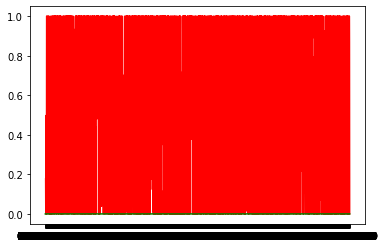

In [17]:
plt.plot(df.Date, df.k, 'r') # plotting t, a separately 
plt.plot(df.Date, df.d, 'g') # plotting t, b separately 
plt.show()

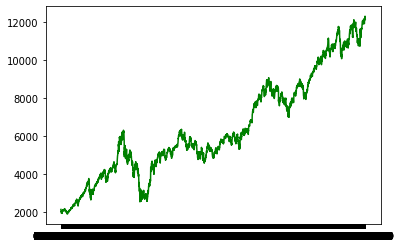

In [18]:
plt.plot(df.Date, df.Close, 'g') # plotting t, c separately 

In [19]:
df.RSI.shift(2)

0             NaN
1             NaN
2         0.00000
3         0.00000
4         0.00000
          ...    
3670    100.00000
3671    100.00000
3672    100.00000
3673     60.83815
3674      0.00000
Name: RSI, Length: 3675, dtype: float64

In [20]:
df.RSI

0         0.000000
1         0.000000
2         0.000000
3        37.665782
4        33.203429
           ...    
3670    100.000000
3671     60.838150
3672      0.000000
3673     50.000000
3674     50.000000
Name: RSI, Length: 3675, dtype: float64

In [21]:
df["RSIsig"] = 0.0
for i in range(0,len(df.RSI)):
  if (df.RSI[i]>0.9):
    df.RSIsig[i] = 1
  elif(df.RSI[i] < 0.2):
    df.RSIsig[i] = -1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
df["actual"] = 0.0
for i in range(0,len(df.change)):
  if df.change[i+1] >= 0:
    df.actual[i] = 1
  else:
    df.actual[i] = -1

In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [0]:
df.head(20)

,Date,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying,k,lowest,highest,change,d,RSI,RSIsig,actual,buyentry,shortentry,buyexit,shortexit,Position,StrategyReturns,DaysPosition
0,2005-01-03,NIFTY,2005-01-27,2092.00,2122.00,2091.70,2118.70,2121.25,2118.70,62614,2.638183e+10,11977400,640600,2115.00,NaN,NaN,NaN,0.00,NaN,0.000000,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,2005-01-04,NIFTY,2005-01-27,2114.70,2120.00,2105.50,2108.85,2111.70,2108.85,54090,2.284549e+10,12632200,654800,2103.75,NaN,NaN,NaN,-9.85,NaN,0.000000,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,2005-01-05,NIFTY,2005-01-27,2104.00,2104.00,1997.00,2033.75,2025.25,2033.75,174022,7.141097e+10,12451400,-180800,2032.20,NaN,NaN,NaN,-75.10,NaN,0.000000,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,2005-01-06,NIFTY,2005-01-27,2025.00,2038.50,1987.00,1998.50,1994.10,1998.50,145413,5.849471e+10,12973400,522000,1998.35,NaN,NaN,NaN,-35.25,NaN,37.665782,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,2005-01-07,NIFTY,2005-01-27,1996.15,2026.75,1990.15,2019.80,2016.70,2019.80,78866,3.170309e+10,12953200,-20200,2015.50,0.177205,1998.50,2118.70,21.30,NaN,33.203429,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
5,2005-01-10,NIFTY,2005-01-27,2019.00,2024.80,1971.40,1976.95,1972.00,1976.95,72581,2.900681e+10,13613400,660200,1982.00,0.000000,1976.95,2108.85,-42.85,NaN,0.000000,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6,2005-01-11,NIFTY,2005-01-27,1977.00,1988.70,1948.10,1953.70,1951.35,1953.70,100970,3.974214e+10,12489800,-1123600,1952.05,0.000000,1953.70,2033.75,-23.25,0.059068,0.000000,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7,2005-01-12,NIFTY,2005-01-27,1960.35,1968.80,1903.00,1916.05,1921.00,1916.05,128215,4.966455e+10,12852800,363000,1913.60,0.000000,1916.05,2019.80,-37.65,0.000000,47.599165,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
8,2005-01-13,NIFTY,2005-01-27,1907.40,1960.00,1907.40,1950.25,1955.15,1950.25,98742,3.843478e+10,10967000,-1885800,1954.55,0.329639,1916.05,2019.80,34.20,0.109880,58.864028,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9,2005-01-14,NIFTY,2005-01-27,1947.00,1954.90,1918.00,1926.35,1931.30,1926.35,107151,4.148882e+10,12429400,1462400,1931.10,0.169130,1916.05,1976.95,-23.90,0.166256,26.120556,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [0]:
confusion_matrix(df['actual'], df["RSIsig"])

array([[ 848,    5,  870],
       [   0,    0,    0],
       [   1,    0, 1951]])

In [0]:
accuracy_score(df['actual'], df["RSIsig"])

0.7616326530612245

In [0]:
df.index

RangeIndex(start=0, stop=3675, step=1)

In [0]:

correct = 0
incorrect = 0
total = len(df.actual)
for i in range(0, len(df.actual)):
  if df.RSIsig[i] == df.actual[i]:
    correct= correct + 1
  else:
    incorrect = incorrect + 1


In [0]:

incorrect/total

0.2383673469387755

In [0]:
correct/total

0.7616326530612245

In [0]:
df

,Date,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying,k,lowest,highest,change,d,RSI,RSIsig,actual
0,2005-01-03,NIFTY,2005-01-27,2092.00,2122.00,2091.70,2118.70,2121.25,2118.70,62614,2.638183e+10,11977400,640600,2115.00,NaN,NaN,NaN,0.00,NaN,0.000000,-1.0,1.0
1,2005-01-04,NIFTY,2005-01-27,2114.70,2120.00,2105.50,2108.85,2111.70,2108.85,54090,2.284549e+10,12632200,654800,2103.75,NaN,NaN,NaN,-9.85,NaN,0.000000,-1.0,-1.0
2,2005-01-05,NIFTY,2005-01-27,2104.00,2104.00,1997.00,2033.75,2025.25,2033.75,174022,7.141097e+10,12451400,-180800,2032.20,NaN,NaN,NaN,-75.10,NaN,0.000000,-1.0,-1.0
3,2005-01-06,NIFTY,2005-01-27,2025.00,2038.50,1987.00,1998.50,1994.10,1998.50,145413,5.849471e+10,12973400,522000,1998.35,NaN,NaN,NaN,-35.25,NaN,37.665782,1.0,-1.0
4,2005-01-07,NIFTY,2005-01-27,1996.15,2026.75,1990.15,2019.80,2016.70,2019.80,78866,3.170309e+10,12953200,-20200,2015.50,0.177205,1998.50,2118.70,21.30,NaN,33.203429,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,2019-12-19,NIFTY,2019-12-26,12228.40,12276.95,12207.60,12268.95,12272.30,12268.95,93583,8.596545e+10,13302975,-17550,12259.70,1.000000,12082.55,12268.95,25.80,1.000000,100.000000,1.0,1.0
3671,2019-12-20,NIFTY,2019-12-26,12270.20,12298.95,12255.50,12290.00,12290.25,12290.00,79874,7.356458e+10,12728100,-574875,12271.80,1.000000,12082.55,12290.00,21.05,1.000000,60.838150,1.0,1.0
3672,2019-12-23,NIFTY,2019-12-26,12265.35,12291.65,12226.10,12276.45,12276.85,12276.45,97965,9.012472e+10,11010900,-1717200,12262.75,0.868255,12187.15,12290.00,-13.55,0.956085,0.000000,-1.0,-1.0
3673,2019-12-24,NIFTY,2019-12-26,12259.95,12314.90,12228.00,12238.45,12236.50,12238.45,102262,9.405263e+10,7411500,-3599400,12214.55,0.000000,12238.45,12290.00,-38.00,0.622752,50.000000,1.0,-1.0


In [0]:
df["buyentry"] = 0.0
df["shortentry"] = 0.0
df["buyexit"] = 0.0
df["shortexit"] = 0.0
for i in range(1,len(df.RSI)):
  if((df.k[i] > df.d[i]) & (df.k[i-1] < df.d[i-1])):
    df.buyentry[i] = 1

  if(df.Position[i-1] >= 1):
    if((df.k[i] < df.d[i]) & (df.k[i-1] > df.d[i-1]) or df.RSI[i]>90):
      df.buyexit[i] = -1 

  if((df.k[i] < df.d[i]) & (df.k[i-1] > df.d[i-1])):
    df.shortentry[i] = -1

  if(df.Position[i-1] <= -1):
    if((df.k[i] > df.d[i]) & (df.k[i-1] < df.d[i-1]) or df.RSI[i]<20):
      df.shortexit[i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is

In [0]:
df['Position'] = 0.0

In [0]:
for i in range(1,len(df.Close)):
  df.Position[i] =df.Position[i-1]+ df.buyentry[i] + df.shortentry[i] +df.buyexit[i] +df.shortexit[i] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df["StrategyReturns"] = 0


In [0]:
df["StrategyReturns"] = 0
for i in range(1,len(df.Close)):
  df.StrategyReturns[i] = df.change[i] * (df.Position[i-1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df.head(15)

,Date,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying,k,lowest,highest,change,d,RSI,RSIsig,actual,buyentry,shortentry,buyexit,shortexit,Position,StrategyReturns,DaysPosition
0,2005-01-03,NIFTY,2005-01-27,2092.00,2122.00,2091.70,2118.70,2121.25,2118.70,62614,2.638183e+10,11977400,640600,2115.00,NaN,NaN,NaN,0.00,NaN,0.000000,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,2005-01-04,NIFTY,2005-01-27,2114.70,2120.00,2105.50,2108.85,2111.70,2108.85,54090,2.284549e+10,12632200,654800,2103.75,NaN,NaN,NaN,-9.85,NaN,0.000000,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,2005-01-05,NIFTY,2005-01-27,2104.00,2104.00,1997.00,2033.75,2025.25,2033.75,174022,7.141097e+10,12451400,-180800,2032.20,NaN,NaN,NaN,-75.10,NaN,0.000000,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,2005-01-06,NIFTY,2005-01-27,2025.00,2038.50,1987.00,1998.50,1994.10,1998.50,145413,5.849471e+10,12973400,522000,1998.35,NaN,NaN,NaN,-35.25,NaN,37.665782,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,2005-01-07,NIFTY,2005-01-27,1996.15,2026.75,1990.15,2019.80,2016.70,2019.80,78866,3.170309e+10,12953200,-20200,2015.50,0.177205,1998.50,2118.70,21.30,NaN,33.203429,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
5,2005-01-10,NIFTY,2005-01-27,2019.00,2024.80,1971.40,1976.95,1972.00,1976.95,72581,2.900681e+10,13613400,660200,1982.00,0.000000,1976.95,2108.85,-42.85,NaN,0.000000,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6,2005-01-11,NIFTY,2005-01-27,1977.00,1988.70,1948.10,1953.70,1951.35,1953.70,100970,3.974214e+10,12489800,-1123600,1952.05,0.000000,1953.70,2033.75,-23.25,0.059068,0.000000,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7,2005-01-12,NIFTY,2005-01-27,1960.35,1968.80,1903.00,1916.05,1921.00,1916.05,128215,4.966455e+10,12852800,363000,1913.60,0.000000,1916.05,2019.80,-37.65,0.000000,47.599165,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
8,2005-01-13,NIFTY,2005-01-27,1907.40,1960.00,1907.40,1950.25,1955.15,1950.25,98742,3.843478e+10,10967000,-1885800,1954.55,0.329639,1916.05,2019.80,34.20,0.109880,58.864028,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9,2005-01-14,NIFTY,2005-01-27,1947.00,1954.90,1918.00,1926.35,1931.30,1926.35,107151,4.148882e+10,12429400,1462400,1931.10,0.169130,1916.05,1976.95,-23.90,0.166256,26.120556,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0.0


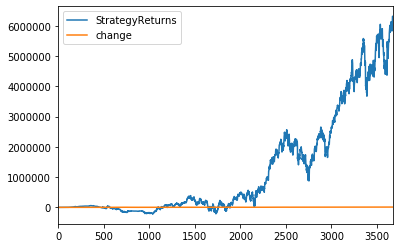

In [0]:
#Finally plot the strategy returns versus Apple returns
df[['StrategyReturns','change']].cumsum().plot()

In [0]:

df["StrategyReturns"].sum()

6123293

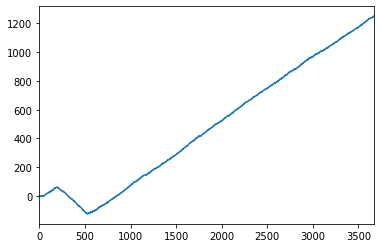

In [0]:
df['Position'].plot()

In [0]:
df.head(15)

,Date,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying,k,lowest,highest,change,RSI,RSIsig,actual,buyentry,shortentry,buyexit,shortexit,Position,Market Returns,Strategy Returns
0,2005-01-03,NIFTY,2005-01-27,2092.00,2122.00,2091.70,2118.70,2121.25,2118.70,62614,2.638183e+10,11977400,640600,2115.00,NaN,NaN,NaN,0.00,0.000000,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,2005-01-04,NIFTY,2005-01-27,2114.70,2120.00,2105.50,2108.85,2111.70,2108.85,54090,2.284549e+10,12632200,654800,2103.75,NaN,NaN,NaN,-9.85,0.000000,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,-0.004649,-0.0
2,2005-01-05,NIFTY,2005-01-27,2104.00,2104.00,1997.00,2033.75,2025.25,2033.75,174022,7.141097e+10,12451400,-180800,2032.20,NaN,NaN,NaN,-75.10,0.000000,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,-0.035612,-0.0
3,2005-01-06,NIFTY,2005-01-27,2025.00,2038.50,1987.00,1998.50,1994.10,1998.50,145413,5.849471e+10,12973400,522000,1998.35,NaN,NaN,NaN,-35.25,37.665782,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.017333,-0.0
4,2005-01-07,NIFTY,2005-01-27,1996.15,2026.75,1990.15,2019.80,2016.70,2019.80,78866,3.170309e+10,12953200,-20200,2015.50,0.177205,1998.50,2118.70,21.30,33.203429,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.010658,0.0
5,2005-01-10,NIFTY,2005-01-27,2019.00,2024.80,1971.40,1976.95,1972.00,1976.95,72581,2.900681e+10,13613400,660200,1982.00,0,1976.95,2108.85,-42.85,0.000000,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,-0.021215,-0.0
6,2005-01-11,NIFTY,2005-01-27,1977.00,1988.70,1948.10,1953.70,1951.35,1953.70,100970,3.974214e+10,12489800,-1123600,1952.05,0,1953.70,2033.75,-23.25,0.000000,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,-0.011761,-0.0
7,2005-01-12,NIFTY,2005-01-27,1960.35,1968.80,1903.00,1916.05,1921.00,1916.05,128215,4.966455e+10,12852800,363000,1913.60,0,1916.05,2019.80,-37.65,47.599165,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.019271,-0.0
8,2005-01-13,NIFTY,2005-01-27,1907.40,1960.00,1907.40,1950.25,1955.15,1950.25,98742,3.843478e+10,10967000,-1885800,1954.55,0.329639,1916.05,2019.80,34.20,58.864028,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.017849,0.0
9,2005-01-14,NIFTY,2005-01-27,1947.00,1954.90,1918.00,1926.35,1931.30,1926.35,107151,4.148882e+10,12429400,1462400,1931.10,0.16913,1916.05,1976.95,-23.90,26.120556,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.012255,-0.0


In [0]:
from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')